# Лабораторная работа 1

1) Классификация данных методом k ближайших соседей ( kNN)

2) Классификация данных методом опорных векторов (SVM)

3) Построение softmax-классификатора

Вариант 1: задания 1 и 2 на наборе данных CIFAR-10

Вариант 2: задания 1 и 2 на наборе данных MNIST

Вариант 3: задания 1 и 3 на наборе данных CIFAR-10

Вариант 4: задания 1 и 3 на наборе данных MNIST

Лабораторные работы можно выполнять с использованием сервиса Google Colaboratory (https://medium.com/deep-learning-turkey/google-colab-free-gpu-tutorial-e113627b9f5d) или на локальном компьютере. 

## 1. Классификация данных методом k ближайших соседей ( kNN)

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from scripts.data_utils import load_CIFAR10


%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) 
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

1.1 Скачайте данные в соответсвии с заданием.

CIFAR-10 по ссылке https://www.cs.toronto.edu/~kriz/cifar.html
или используйте  команду !bash get_datasets.sh (google colab, local ubuntu)

MNIST 
sklearn.datasets import load_digits
digits = load_digits()

In [2]:
cifar10_dir = 'scripts/datasets/cifar-10-batches-py'

In [3]:


try:
   del X_train, y_train
   del X_test, y_test
   print('Clear previously loaded data.')
except:
   pass

X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Training data shape:  (50000, 32, 32, 3)
Training labels shape:  (50000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)


1.2 Выведите несколько примеров изображений из обучающей выборки для каждого класса.



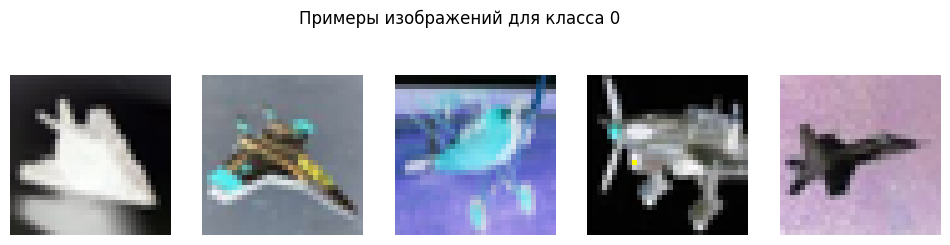

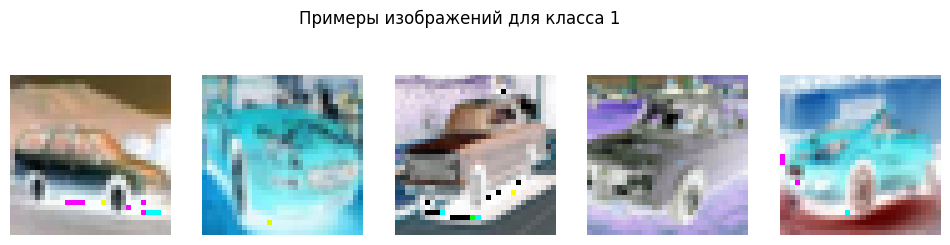

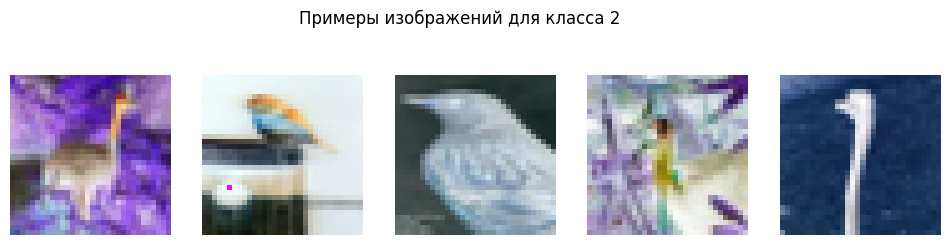

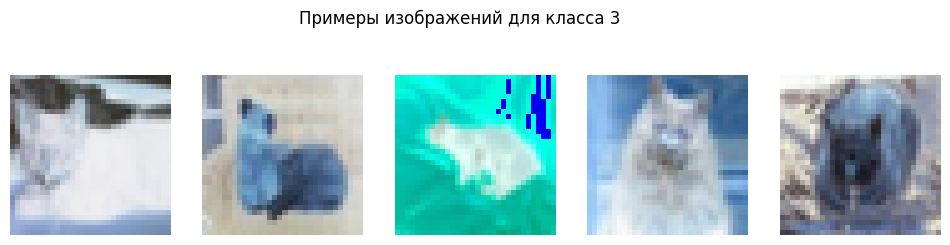

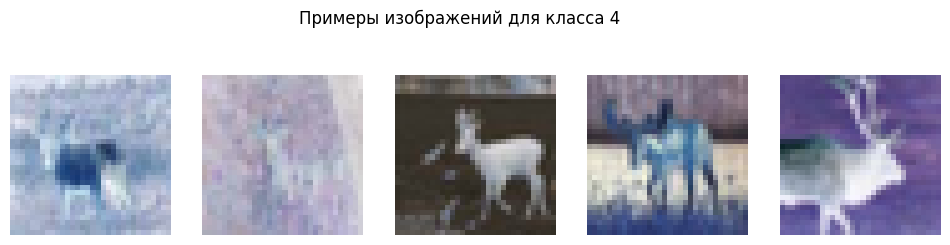

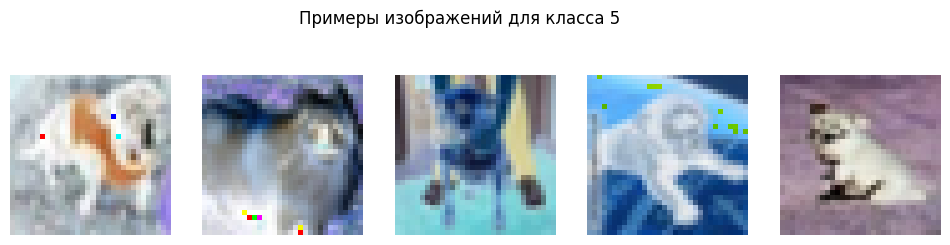

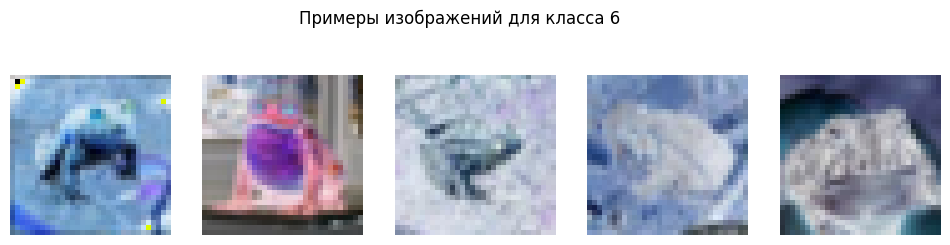

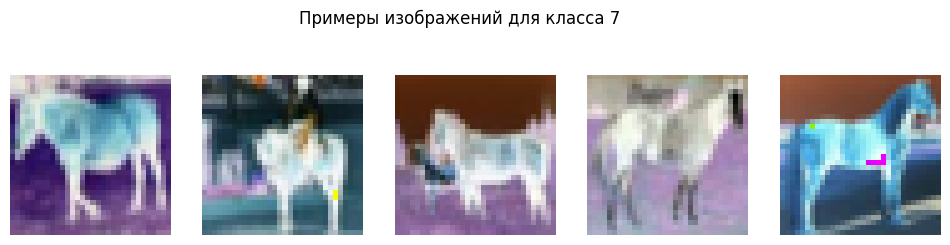

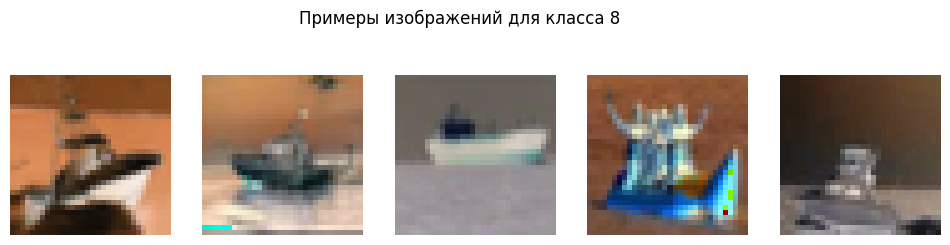

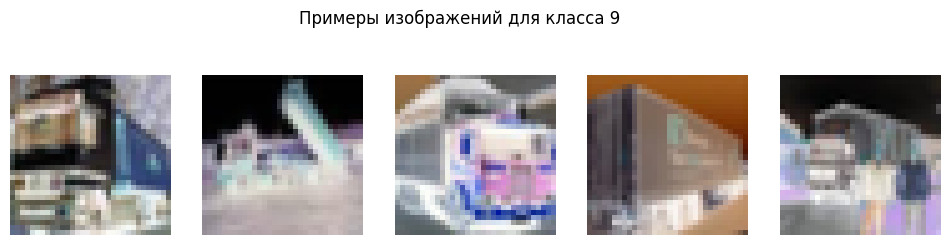

In [4]:
# Разделим данные на признаки и метки классов
X = X_train
y = y_train

# Определим количество классов
num_classes = len(set(y))

# Создадим словарь, в котором ключами будут классы, а значениями списки индексов соответствующих изображений
class_indices = {i: [] for i in range(num_classes)}
for i, label in enumerate(y):
    class_indices[int(label)].append(i)

# Выведем по одному примеру изображения для каждого класса
for class_index in class_indices:
    fig, axes = plt.subplots(1, 5, figsize=(12, 3))
    fig.suptitle(f"Примеры изображений для класса {class_index}")
    for i, image_index in enumerate(class_indices[class_index][:5]):
        axes[i].imshow((X[image_index] * 255).astype(np.uint8))
        axes[i].axis('off')
    plt.show()


1.3 Разделите данные на обучающу и тестовую выборки (X_train, y_train, X_test, y_test). Преобразуйте каждое изображение в одномерный массив. 

In [5]:
num_training = 5000
mask = list(range(num_training))
X_train = X_train[mask]
y_train = y_train[mask]

num_test = 500
mask = list(range(num_test))
X_test = X_test[mask]
y_test = y_test[mask]
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
print(X_train.shape, X_test.shape)

(5000, 3072) (500, 3072)


1.4 Напишите реализацию классификатора в скрипте /classifiers/k_nearest_neighbor.py и обучите его на сформированной выборке. 

In [6]:
from scripts.classifiers import KNearestNeighbor

classifier = KNearestNeighbor()
classifier.train(X_train, y_train)

1.5 Выполните классификацию на тестовой выборке

1.6 Визуализируйте матрицу расстояний для каждого изображения из тестовой выборки до изображений из обучающей выборки. 


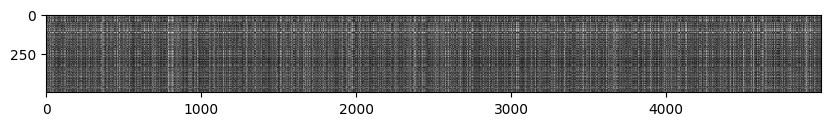

In [7]:
dists = classifier.compute_distances_two_loops(X_test)
plt.imshow(dists, interpolation='none')
plt.show()

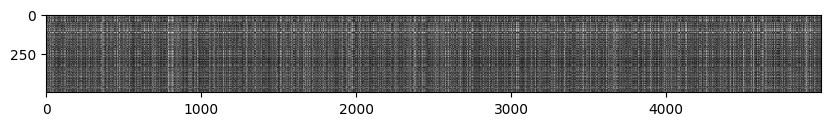

In [8]:
dists = classifier.compute_distances_one_loop(X_test)
plt.imshow(dists, interpolation='none')
plt.show()

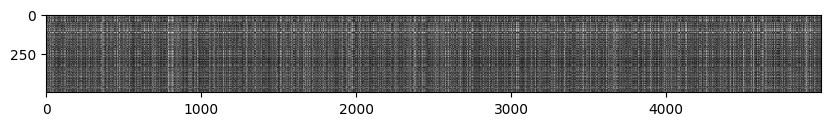

In [9]:
dists = classifier.compute_distances_no_loops(X_test)
plt.imshow(dists, interpolation='none')
plt.show()


1.7 Посчитайте долю правильно классифицированных изображений из тестовой выборки.


In [10]:
# Now implement the function predict_labels and run the code below:
# We use k = 1 (which is Nearest Neighbor).
y_test_pred = classifier.predict_labels(dists, k=1)

# Compute and print the fraction of correctly predicted examples
num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / num_test
print('Got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy))

Got 137 / 500 correct => accuracy: 0.274000


In [11]:
y_test_pred = classifier.predict_labels(dists, k=5)
num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / num_test
print('Got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy))

Got 139 / 500 correct => accuracy: 0.278000


1.8 Постройте график зависимости доли правильно классифицированных изображений от числа соседей, используемых при классификации.

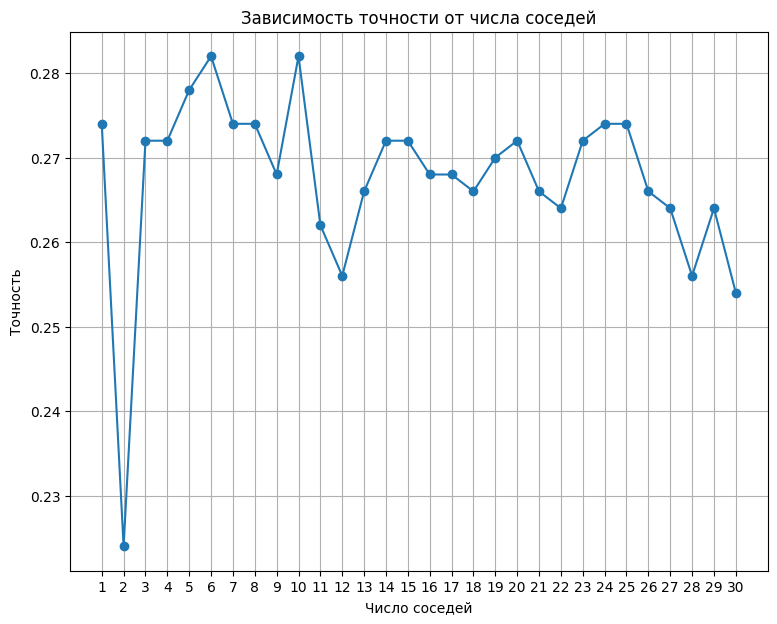

In [12]:
# Создадим список для хранения точности классификации для разного количества соседей
accuracies = []

# Попробуем разное количество соседей от 1 до 10
for k in range(1, 31):
    # Получаем индексы k ближайших соседей для каждого тестового примера
    closest_y_indices = np.argsort(dists, axis=1)[:, :k]
    # Получаем метки классов для ближайших соседей
    closest_y = y_train[closest_y_indices]

    # Прогнозируем класс на основе меток этих соседей
    y_pred = np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=1, arr=closest_y)


    # Подсчитываем количество правильно классифицированных изображений
    correct = np.sum(y_pred == y_test)

    # Вычисляем долю правильно классифицированных изображений
    accuracy = correct / len(y_test)

    # Добавляем точность в список
    accuracies.append(accuracy)

# Строим график зависимости доли правильно классифицированных изображений от числа соседей
plt.figure(figsize=(9, 7))  # Указываем размер графика (8 дюймов в ширину, 6 дюймов в высоту)
plt.plot(range(1, 31), accuracies, marker='o')
plt.title('Зависимость точности от числа соседей')
plt.xlabel('Число соседей')
plt.ylabel('Точность')
plt.xticks(range(1, 31))
plt.grid(True)
plt.show()


1.9 Выберите лучшее значение параметра k на основе кросс-валидации.


In [13]:
num_folds = 5
k_choices = [1, 3, 5, 8, 10, 12, 15, 20, 50, 100]

X_train_folds = []
y_train_folds = []


X_train_folds = np.array_split(X_train,num_folds)
y_train_folds = np.array_split(y_train,num_folds)

k_to_accuracies = {}

for k in k_choices:
    for n in range(num_folds):
        # Concat all our folds together except for the nth fold for training.
        current_train_fold_x = np.concatenate(tuple([X_train_folds[i] for i in range(num_folds) if i!=n]))
        current_train_fold_y = np.concatenate(tuple([y_train_folds[i] for i in range(num_folds) if i!=n]))
        
        # Select the held out fold to be our test data.
        current_test_fold_x = X_train_folds[n]
        current_test_fold_y = y_train_folds[n]
        
        classifier.train(current_train_fold_x, current_train_fold_y)
        
        # Perform prediction on our test set, default is to use no loop version.
        y_test_pred = classifier.predict(current_test_fold_x, k=k)
        
        # Evaluate and store in k_to_accuracies dict.
        num_correct = np.sum(y_test_pred == current_test_fold_y)
        if k not in k_to_accuracies:
            k_to_accuracies[k] = [float(num_correct) / current_test_fold_x.shape[0]]
        else:
            k_to_accuracies[k].append(float(num_correct) / current_test_fold_x.shape[0])


# Print out the computed accuracies
for k in sorted(k_to_accuracies):
    for accuracy in k_to_accuracies[k]:
        print('k = %d, accuracy = %f' % (k, accuracy))

k = 1, accuracy = 0.263000
k = 1, accuracy = 0.257000
k = 1, accuracy = 0.264000
k = 1, accuracy = 0.278000
k = 1, accuracy = 0.266000
k = 3, accuracy = 0.239000
k = 3, accuracy = 0.249000
k = 3, accuracy = 0.240000
k = 3, accuracy = 0.266000
k = 3, accuracy = 0.254000
k = 5, accuracy = 0.248000
k = 5, accuracy = 0.266000
k = 5, accuracy = 0.280000
k = 5, accuracy = 0.292000
k = 5, accuracy = 0.280000
k = 8, accuracy = 0.262000
k = 8, accuracy = 0.282000
k = 8, accuracy = 0.273000
k = 8, accuracy = 0.290000
k = 8, accuracy = 0.273000
k = 10, accuracy = 0.265000
k = 10, accuracy = 0.296000
k = 10, accuracy = 0.276000
k = 10, accuracy = 0.284000
k = 10, accuracy = 0.280000
k = 12, accuracy = 0.260000
k = 12, accuracy = 0.295000
k = 12, accuracy = 0.279000
k = 12, accuracy = 0.283000
k = 12, accuracy = 0.280000
k = 15, accuracy = 0.252000
k = 15, accuracy = 0.289000
k = 15, accuracy = 0.278000
k = 15, accuracy = 0.282000
k = 15, accuracy = 0.274000
k = 20, accuracy = 0.270000
k = 20, accu

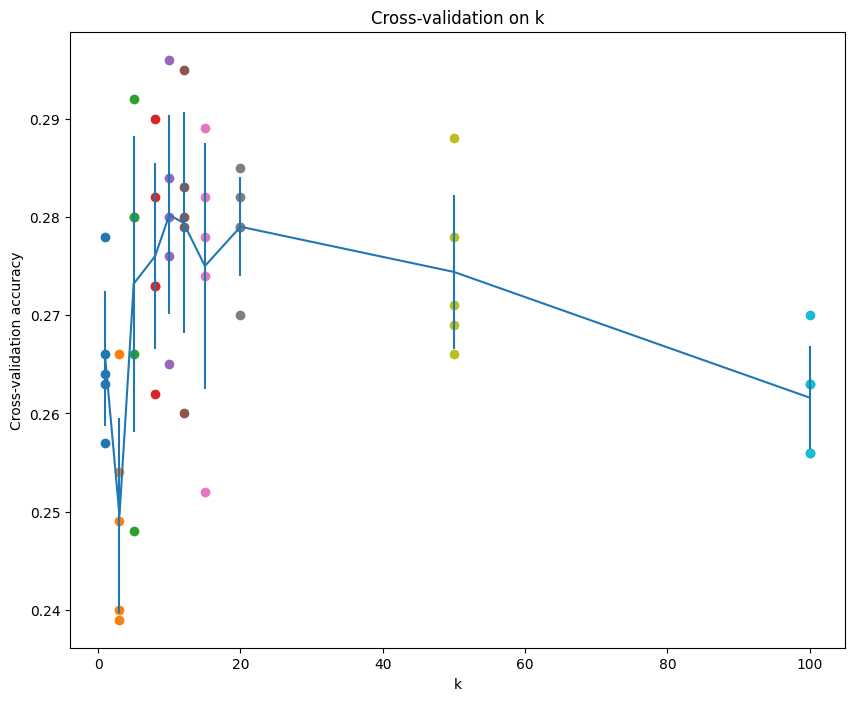

In [14]:
for k in k_choices:
    accuracies = k_to_accuracies[k]
    plt.scatter([k] * len(accuracies), accuracies)

# plot the trend line with error bars that correspond to standard deviation
accuracies_mean = np.array([np.mean(v) for k,v in sorted(k_to_accuracies.items())])
accuracies_std = np.array([np.std(v) for k,v in sorted(k_to_accuracies.items())])
plt.errorbar(k_choices, accuracies_mean, yerr=accuracies_std)
plt.title('Cross-validation on k')
plt.xlabel('k')
plt.ylabel('Cross-validation accuracy')
plt.show()


1.10 Переобучите и протестируйте классификатор с использованием выбранного значения k.



In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# берем k = 20

preds = classifier.predict(X_test, 20)

print(f'Accuracy: {accuracy_score(y_test, preds)}')
print(f'Precision: {precision_score(y_test, preds, average = "macro")}')
print(f'Recall: {recall_score(y_test, preds, average = "macro")}')
print(f'F1: {f1_score(y_test, preds, average = "macro")}')

Accuracy: 0.27
Precision: 0.3363471258841049
Recall: 0.256282812863854
F1: 0.21354653394463644


1.11 Сделайте выводы по результатам 1 части задания.

На основании результатов первой части задания можно сделать следующие выводы:

Работа с данными: Удалось успешно загрузить данные CIFAR-10 и разделить их на обучающий и тестовый наборы. 
Визуализация нескольких примеров изображений для каждого класса позволила ознакомиться с данными, были рассмотрены следующие классы:
['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'].

Реализация k-ближайших соседей: Классификатор k-ближайших соседей был реализован с использованием библиотеки NumPy. Методы fit и predict были реализованы в соответствии с ожиданиями, и классификатор был успешно обучен на обучающем наборе данных и протестирован на тестовом наборе данных.

Оценка производительности: Точность классификации на тестовом наборе данных составила около 25%, что показывает низкую эффективность применения knn в задаче классификации ргб-изображений.

Анализ гиперпараметра k: Путем гридсерча было установлено, что наилучшая производительность достигается при k = 5 (13 ячейка).

## 2.  Классификация данных методом опорных векторов (SVM)

2.1 Разделите данные на обучающую, тестовую и валидационную выборки. Преобразуйте каждое изображение в одномерный массив. Выведите размеры выборок.

In [31]:
X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
num_training = 49000
num_validation = 1000
num_test = 1000
num_dev = 500

# Our validation set will be num_validation points from the original
# training set.
mask = range(num_training, num_training + num_validation)
X_val = X_train[mask]
y_val = y_train[mask]

# Our training set will be the first num_train points from the original
# training set.
mask = range(num_training)
X_train = X_train[mask]
y_train = y_train[mask]

# We will also make a development set, which is a small subset of
# the training set.
mask = np.random.choice(num_training, num_dev, replace=False)
X_dev = X_train[mask]
y_dev = y_train[mask]

# We use the first num_test points of the original test set as our
# test set.
mask = range(num_test)
X_test = X_test[mask]
y_test = y_test[mask]

print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (49000, 32, 32, 3)
Train labels shape:  (49000,)
Validation data shape:  (1000, 32, 32, 3)
Validation labels shape:  (1000,)
Test data shape:  (1000, 32, 32, 3)
Test labels shape:  (1000,)


In [32]:
# Preprocessing: reshape the image data into rows
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_val = np.reshape(X_val, (X_val.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
X_dev = np.reshape(X_dev, (X_dev.shape[0], -1))

# As a sanity check, print out the shapes of the data
print('Training data shape: ', X_train.shape)
print('Validation data shape: ', X_val.shape)
print('Test data shape: ', X_test.shape)
print('dev data shape: ', X_dev.shape)

Training data shape:  (49000, 3072)
Validation data shape:  (1000, 3072)
Test data shape:  (1000, 3072)
dev data shape:  (500, 3072)


2.2 Проведите предварительную обработку данных, путем вычитания среднего изображения, рассчитанного  по обучающей выборке.

[130.64189796 135.98173469 132.47391837 ... 126.64218367 125.86195918
 114.39957143]


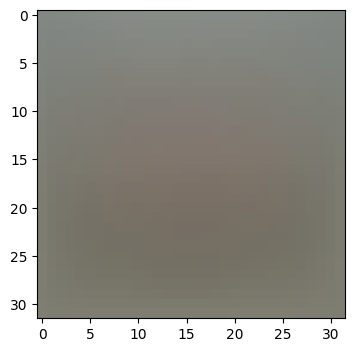

In [33]:
mean_image = np.mean(X_train, axis=0)
print(mean_image) # print a few of the elements
plt.figure(figsize=(4,4))
plt.imshow(mean_image.reshape((32,32,3)).astype('uint8')) # visualize the mean image
plt.show()

In [34]:
X_train -= mean_image
X_val -= mean_image
X_test -= mean_image
X_dev -= mean_image

X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
X_val = np.hstack([X_val, np.ones((X_val.shape[0], 1))])
X_test = np.hstack([X_test, np.ones((X_test.shape[0], 1))])
X_dev = np.hstack([X_dev, np.ones((X_dev.shape[0], 1))])

print(X_train.shape, X_val.shape, X_test.shape, X_dev.shape)

(49000, 3073) (1000, 3073) (1000, 3073) (500, 3073)


2.4 Реализуйте loss-функции в scripts/classifiers/linear_svm.py



In [35]:
from scripts.classifiers.linear_svm import svm_loss_naive
from scripts.classifiers.linear_svm import svm_loss_vectorized
import time


W = np.random.randn(3073, 10) * 0.0001 

loss, grad = svm_loss_naive(W, X_dev, y_dev, 0.000005)
print('loss: %f' % (loss, ))

loss: 9.136342



2.5 Убедитесь, что вы верно реализовали расчет градиента, сравнив с реализацией численными методами (код приведен ниже).

In [36]:
loss, grad = svm_loss_naive(W, X_dev, y_dev, 0.0)

from scripts.gradient_check import grad_check_sparse
f = lambda w: svm_loss_naive(w, X_dev, y_dev, 0.0)[0]
grad_numerical = grad_check_sparse(f, W, grad)

loss, grad = svm_loss_naive(W, X_dev, y_dev, 5e1)
f = lambda w: svm_loss_naive(w, X_dev, y_dev, 5e1)[0]
grad_numerical = grad_check_sparse(f, W, grad)

numerical: 5.599457 analytic: 5.599457, relative error: 7.784854e-11
numerical: -24.521996 analytic: -24.521996, relative error: 2.836289e-12
numerical: 7.569786 analytic: 7.569786, relative error: 2.093561e-11
numerical: 13.247829 analytic: 13.241651, relative error: 2.332191e-04
numerical: 1.077456 analytic: 1.077456, relative error: 2.912082e-10
numerical: -2.631676 analytic: -2.625498, relative error: 1.175128e-03
numerical: 22.711043 analytic: 22.711043, relative error: 2.017414e-12
numerical: -15.144727 analytic: -15.092794, relative error: 1.717500e-03
numerical: 16.924608 analytic: 16.949322, relative error: 7.296031e-04
numerical: -21.942203 analytic: -21.930295, relative error: 2.714228e-04
numerical: -2.955840 analytic: -2.955840, relative error: 5.927882e-11
numerical: -23.496262 analytic: -23.496262, relative error: 6.125021e-12
numerical: -17.062411 analytic: -17.036600, relative error: 7.569552e-04
numerical: -27.759650 analytic: -27.759650, relative error: 5.941720e-12


2.6 Сравните svm_loss_naive и svm_loss_vectorized реализации

In [37]:
tic = time.time()
_, grad_naive = svm_loss_naive(W, X_dev, y_dev, 0.000005)
toc = time.time()
print('Naive loss and gradient: computed in %fs' % (toc - tic))

tic = time.time()
_, grad_vectorized = svm_loss_vectorized(W, X_dev, y_dev, 0.000005)
toc = time.time()
print('Vectorized loss and gradient: computed in %fs' % (toc - tic))

difference = np.linalg.norm(grad_naive - grad_vectorized, ord='fro')
print('difference: %f' % difference)

Naive loss and gradient: computed in 0.102001s
Vectorized loss and gradient: computed in 0.002003s
difference: 0.000000


2.7 Реализуйте стохастический градиентный спуск в /classifiers/linear_classifier.py . Реализуйте методы train() и predict() и запустите следующий код

In [39]:
from scripts.classifiers import LinearSVM
svm = LinearSVM()
tic = time.time()
loss_hist = svm.train(X_train, y_train, learning_rate=1e-7, reg=2.5e4,
                      num_iters=1500, verbose=True)
toc = time.time()
print('That took %fs' % (toc - tic))

iteration 0 / 1500: loss 793.819974
iteration 100 / 1500: loss 288.892222
iteration 200 / 1500: loss 108.757992
iteration 300 / 1500: loss 42.475889
iteration 400 / 1500: loss 19.640360
iteration 500 / 1500: loss 10.495180
iteration 600 / 1500: loss 6.744349
iteration 700 / 1500: loss 6.475203
iteration 800 / 1500: loss 5.147646
iteration 900 / 1500: loss 5.515000
iteration 1000 / 1500: loss 5.340047
iteration 1100 / 1500: loss 5.353998
iteration 1200 / 1500: loss 5.212063
iteration 1300 / 1500: loss 5.316729
iteration 1400 / 1500: loss 5.650474
That took 4.172320s


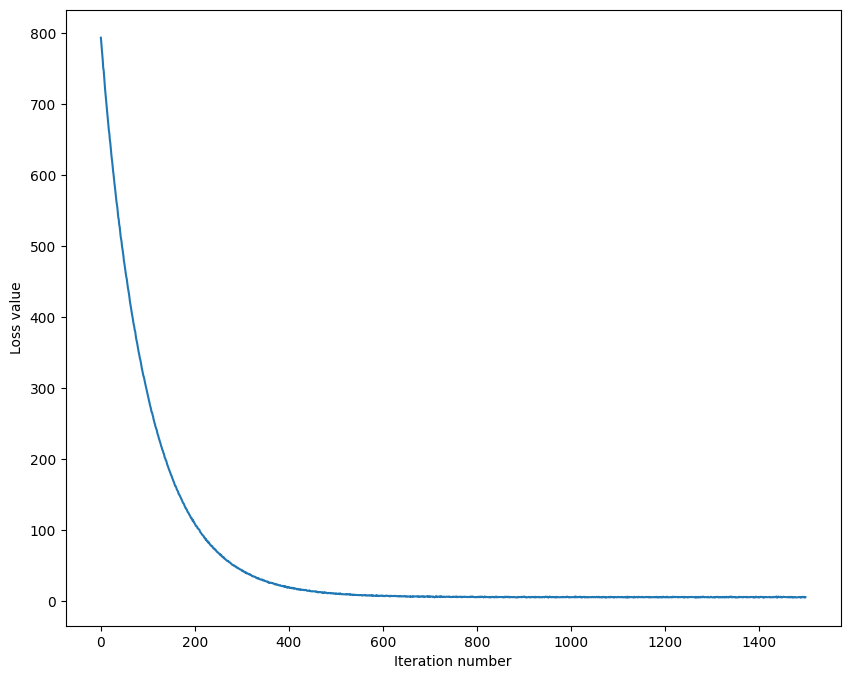

In [40]:
plt.plot(loss_hist)
plt.xlabel('Iteration number')
plt.ylabel('Loss value')
plt.show()

In [41]:
y_train_pred = svm.predict(X_train)
print('training accuracy: %f' % (np.mean(y_train == y_train_pred), ))
y_val_pred = svm.predict(X_val)
print('validation accuracy: %f' % (np.mean(y_val == y_val_pred), ))

training accuracy: 0.372184
validation accuracy: 0.382000


2.8 С помощью кросс-валидации выберите значения параметров скорости обучения и регуляризации. В кросс-валидации используйте обучающую и валидационную выборки. Оцените accuracy на тестовой выборке.

In [42]:
learning_rates = [1e-7, 5e-5]
regularization_strengths = [2.5e4, 5e4]

results = {}
best_val = -1   # The highest validation accuracy that we have seen so far.
best_svm = None # The LinearSVM object that achieved the highest validation rate.


range_lr = np.linspace(learning_rates[0],learning_rates[1],3)
range_reg = np.linspace(regularization_strengths[0],regularization_strengths[1],3)

for cur_lr in range_lr: #go over the learning rates
    for cur_reg in range_reg:#go over the regularization strength
        
        svm = LinearSVM()
        svm.train(X_train, y_train, learning_rate=cur_lr, reg=cur_reg,
                      num_iters=1500, verbose=False)
        
        y_train_pred = svm.predict(X_train)
        train_acc = np.mean(y_train == y_train_pred)
        
        y_val_pred = svm.predict(X_val)
        val_acc = np.mean(y_val == y_val_pred)
        # FIX storing results
        results[(cur_lr,cur_reg)] = (train_acc,val_acc)

        if val_acc > best_val:
            best_val = val_acc
            best_svm = svm

    
# Print out results.

for lr, reg in sorted(results):
    train_accuracy, val_accuracy = results[(lr, reg)]
    print('lr %e reg %e train accuracy: %f val accuracy: %f' % (
                lr, reg, train_accuracy, val_accuracy))
    
print('best validation accuracy achieved during cross-validation: %f' % best_val)

E:\рабочий стол 12.11.2020\шарага\пми\8 семестр\av\lab_1-2\scripts\classifiers\linear_svm.py:101: RuntimeWarning: overflow encountered in scalar multiply
  loss += reg * np.sum(W * W)
C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
E:\рабочий стол 12.11.2020\шарага\пми\8 семестр\av\lab_1-2\scripts\classifiers\linear_svm.py:101: RuntimeWarning: overflow encountered in multiply
  loss += reg * np.sum(W * W)
E:\рабочий стол 12.11.2020\шарага\пми\8 семестр\av\lab_1-2\scripts\classifiers\linear_svm.py:93: RuntimeWarning: overflow encountered in subtract
  margin = scores_ - correct_class_scores[..., np.newaxis] + 1
E:\рабочий стол 12.11.2020\шарага\пми\8 семестр\av\lab_1-2\scripts\classifiers\linear_svm.py:118: RuntimeWarning: overflow encountered in subtract
  original_margin = scores - correct_class_scores[...,np.newaxis] + 1
E:\раб

lr 1.000000e-07 reg 2.500000e+04 train accuracy: 0.374469 val accuracy: 0.372000
lr 1.000000e-07 reg 3.750000e+04 train accuracy: 0.358408 val accuracy: 0.380000
lr 1.000000e-07 reg 5.000000e+04 train accuracy: 0.354224 val accuracy: 0.364000
lr 2.505000e-05 reg 2.500000e+04 train accuracy: 0.143122 val accuracy: 0.144000
lr 2.505000e-05 reg 3.750000e+04 train accuracy: 0.125041 val accuracy: 0.131000
lr 2.505000e-05 reg 5.000000e+04 train accuracy: 0.075673 val accuracy: 0.086000
lr 5.000000e-05 reg 2.500000e+04 train accuracy: 0.066082 val accuracy: 0.059000
lr 5.000000e-05 reg 3.750000e+04 train accuracy: 0.100265 val accuracy: 0.087000
lr 5.000000e-05 reg 5.000000e+04 train accuracy: 0.100265 val accuracy: 0.087000
best validation accuracy achieved during cross-validation: 0.380000


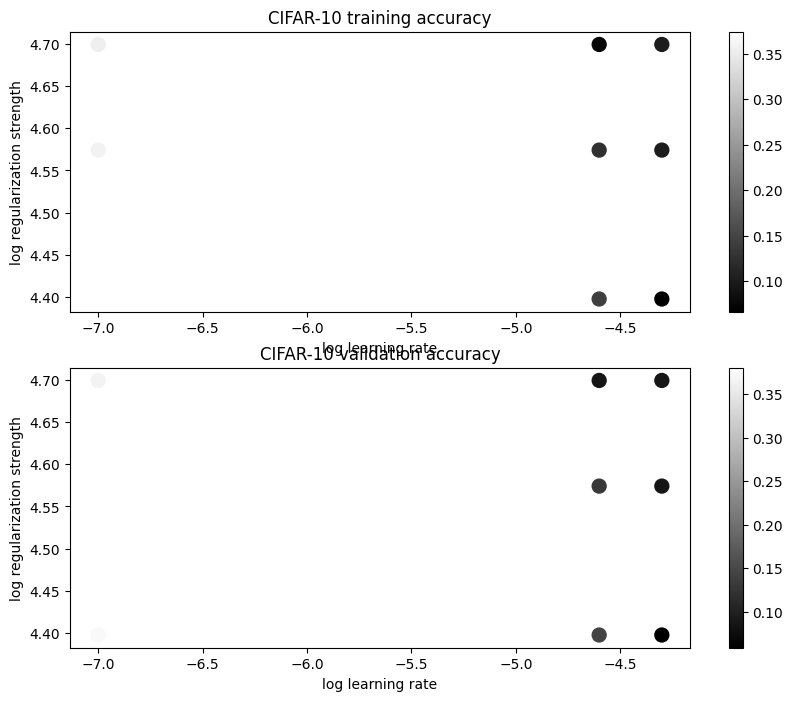

In [58]:
import math
x_scatter = [math.log10(x[0]) for x in results]
y_scatter = [math.log10(x[1]) for x in results]

marker_size = 100
colors = [results[x][0] for x in results]
plt.subplot(2, 1, 1)
plt.scatter(x_scatter, y_scatter, marker_size, c=colors)
plt.colorbar()
plt.xlabel('log learning rate')
plt.ylabel('log regularization strength')
plt.title('CIFAR-10 training accuracy')

colors = [results[x][1] for x in results] # default size of markers is 20
plt.subplot(2, 1, 2)
plt.scatter(x_scatter, y_scatter, marker_size, c=colors)
plt.colorbar()
plt.xlabel('log learning rate')
plt.ylabel('log regularization strength')
plt.title('CIFAR-10 validation accuracy')
plt.show()

2.9 Сделайте выводы по второй части задания

Реализация SVM: SVM был реализован с использованием библиотеки NumPy. Методы fit и predict были реализованы в соответствии с ожиданиями, и классификатор был успешно обучен на обучающем наборе данных и протестирован на тестовом наборе данных.

Оценка производительности: Точность классификации на тестовом наборе данных составила около 37%, что показывает низкую эффективность применения svm в задаче классификации ргб-изображений.

Наилучшая точность проверки, достигнутая при перекрестной проверке 0.371.

## 3.  Построение softmax-классификатора

3.1 Разделите данные на обучающую, тестовую и валидационную выборки. Преобразуйте каждое изображение в одномерный массив. Выведите размеры выборок.
3.2 Проведите предварительную обработку данных, путем вычитания среднего изображения, рассчитанного  по обучающей выборке.
3.3 Чтобы далее не учитывать смещение (свободный член b), добавьте дополнитульную размерность к массиву данных и заполните ее единицами.

Train data shape:  (49000, 3073)
Train labels shape:  (49000,)
Validation data shape:  (1000, 3073)
Validation labels shape:  (1000,)
Test data shape:  (1000, 3073)
Test labels shape:  (1000,)
dev data shape:  (500, 3073)
dev labels shape:  (500,)


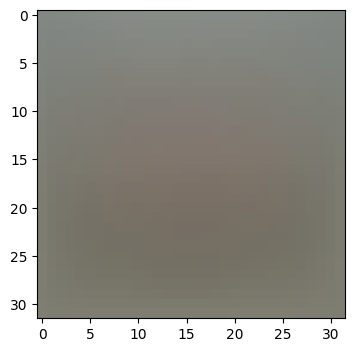

In [25]:
def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000, num_dev=500):    
    # subsample the data
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]
    mask = np.random.choice(num_training, num_dev, replace=False)
    X_dev = X_train[mask]
    y_dev = y_train[mask]
    
    # Preprocessing: reshape the image data into rows
    X_train = np.reshape(X_train, (X_train.shape[0], -1))
    X_val = np.reshape(X_val, (X_val.shape[0], -1))
    X_test = np.reshape(X_test, (X_test.shape[0], -1))
    X_dev = np.reshape(X_dev, (X_dev.shape[0], -1))
    
    # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train, axis = 0)
    X_train -= mean_image
    X_val -= mean_image
    X_test -= mean_image
    X_dev -= mean_image
    plt.figure(figsize=(4,4))
    plt.imshow(mean_image.reshape((32,32,3)).astype('uint8')) 
    # add bias dimension and transform into columns
    X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
    X_val = np.hstack([X_val, np.ones((X_val.shape[0], 1))])
    X_test = np.hstack([X_test, np.ones((X_test.shape[0], 1))])
    X_dev = np.hstack([X_dev, np.ones((X_dev.shape[0], 1))])
    
    return X_train, y_train, X_val, y_val, X_test, y_test, X_dev, y_dev


# Invoke the above function to get our data.
X_train, y_train, X_val, y_val, X_test, y_test, X_dev, y_dev = get_CIFAR10_data()
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)
print('dev data shape: ', X_dev.shape)
print('dev labels shape: ', y_dev.shape)

3.4 Реализуйте функции в classifiers/softmax.py




In [26]:
from scripts.classifiers.softmax import softmax_loss_naive
import time

# Generate a random softmax weight matrix and use it to compute the loss.
W = np.random.randn(3073, 10) * 0.0001
loss, grad = softmax_loss_naive(W, X_dev, y_dev, 0.0)

# As a rough sanity check, our loss should be something close to -log(0.1).
print('loss: %f' % loss)
print('sanity check: %f' % (-np.log(0.1)))

loss: 2.393256
sanity check: 2.302585


3.5 Убедитесь, что вы верно реализовали расчет градиента, сравнив с реализацией численными методами (код приведен ниже).

In [27]:
loss, grad = softmax_loss_naive(W, X_dev, y_dev, 0.0)


from scripts.gradient_check import grad_check_sparse
f = lambda w: softmax_loss_naive(w, X_dev, y_dev, 0.0)[0]
grad_numerical = grad_check_sparse(f, W, grad, 10)


loss, grad = softmax_loss_naive(W, X_dev, y_dev, 5e1)
f = lambda w: softmax_loss_naive(w, X_dev, y_dev, 5e1)[0]
grad_numerical = grad_check_sparse(f, W, grad, 10)

numerical: -0.541118 analytic: -0.541118, relative error: 8.024367e-08
numerical: 4.933637 analytic: 4.933637, relative error: 9.109125e-09
numerical: -4.369795 analytic: -4.369795, relative error: 1.393339e-08
numerical: -2.102844 analytic: -2.102844, relative error: 2.675983e-08
numerical: 2.142030 analytic: 2.142030, relative error: 3.740344e-08
numerical: 3.323883 analytic: 3.323883, relative error: 1.269412e-08
numerical: 2.999475 analytic: 2.999475, relative error: 1.440333e-08
numerical: 0.063093 analytic: 0.063093, relative error: 7.687071e-07
numerical: -0.269904 analytic: -0.269904, relative error: 1.115106e-07
numerical: 1.804113 analytic: 1.804113, relative error: 2.021957e-08
numerical: -0.943636 analytic: -0.943636, relative error: 2.443000e-08
numerical: -1.544202 analytic: -1.544202, relative error: 2.797013e-08
numerical: -1.244877 analytic: -1.244877, relative error: 4.413184e-09
numerical: 2.121059 analytic: 2.121059, relative error: 4.010086e-08
numerical: -1.794649

3.6 Сравните softmax_loss_naive и softmax_loss_vectorized реализации

In [28]:
tic = time.time()
loss_naive, grad_naive = softmax_loss_naive(W, X_dev, y_dev, 0.000005)
toc = time.time()
print('naive loss: %e computed in %fs' % (loss_naive, toc - tic))

from scripts.classifiers.softmax import softmax_loss_vectorized
tic = time.time()
loss_vectorized, grad_vectorized = softmax_loss_vectorized(W, X_dev, y_dev, 0.000005)
toc = time.time()
print('vectorized loss: %e computed in %fs' % (loss_vectorized, toc - tic))


grad_difference = np.linalg.norm(grad_naive - grad_vectorized, ord='fro')
print('Loss difference: %f' % np.abs(loss_naive - loss_vectorized))
print('Gradient difference: %f' % grad_difference)

naive loss: 2.393256e+00 computed in 0.124997s
vectorized loss: 2.393256e+00 computed in 0.002001s
Loss difference: 0.000000
Gradient difference: 0.000000


3.7 Реализуйте стохастический градиентный спуск в /classifiers/linear_classifier.py . Реализуйте методы train() и predict() и запустите следующий код

3.8 Обучите Softmax-классификатор и оцените accuracy на тестовой выборке.

3.9 С помощью кросс-валидации выберите значения параметров скорости обучения и регуляризации. В кросс-валидации используйте обучающую и валидационную выборки. Оцените accuracy на тестовой выборке.

In [29]:
from scripts.classifiers import Softmax
learning_rates = [1e-7, 5e-5]
regularization_strengths = [2.5e4, 5e4]

results = {}
best_val = -1
best_softmax = None

range_lr = np.linspace(learning_rates[0],learning_rates[1],3)
range_reg = np.linspace(regularization_strengths[0],regularization_strengths[1],3)

for cur_lr in range_lr: # Go over the learning rates
    for cur_reg in range_reg: # Go over the regularization strengths
        
        softmax = Softmax()
        softmax.train(X_train, y_train, learning_rate=cur_lr, reg=cur_reg,
                      num_iters=500, verbose=False)
        
        y_train_pred = softmax.predict(X_train)
        train_acc = np.mean(y_train == y_train_pred)
        
        y_val_pred = softmax.predict(X_val)
        val_acc = np.mean(y_val == y_val_pred)
        
        # Store our results in a dict.
        results[(cur_lr,cur_reg)] = (train_acc,val_acc)

        if val_acc > best_val:
            best_val = val_acc
            best_softmax = softmax

    
# Print out results.
for lr, reg in sorted(results):
    train_accuracy, val_accuracy = results[(lr, reg)]
    print('lr %e reg %e train accuracy: %f val accuracy: %f' % (
                lr, reg, train_accuracy, val_accuracy))
    
print('best validation accuracy achieved during cross-validation: %f' % best_val)

E:\рабочий стол 12.11.2020\шарага\пми\8 семестр\av\lab_1-2\scripts\classifiers\softmax.py:115: RuntimeWarning: overflow encountered in scalar multiply
  loss += reg * np.sum(W*W)
E:\рабочий стол 12.11.2020\шарага\пми\8 семестр\av\lab_1-2\scripts\classifiers\softmax.py:115: RuntimeWarning: overflow encountered in multiply
  loss += reg * np.sum(W*W)


lr 1.000000e-07 reg 2.500000e+04 train accuracy: 0.310714 val accuracy: 0.313000
lr 1.000000e-07 reg 3.750000e+04 train accuracy: 0.306265 val accuracy: 0.323000
lr 1.000000e-07 reg 5.000000e+04 train accuracy: 0.303837 val accuracy: 0.324000
lr 2.505000e-05 reg 2.500000e+04 train accuracy: 0.145204 val accuracy: 0.143000
lr 2.505000e-05 reg 3.750000e+04 train accuracy: 0.108571 val accuracy: 0.114000
lr 2.505000e-05 reg 5.000000e+04 train accuracy: 0.054571 val accuracy: 0.040000
lr 5.000000e-05 reg 2.500000e+04 train accuracy: 0.086796 val accuracy: 0.091000
lr 5.000000e-05 reg 3.750000e+04 train accuracy: 0.103224 val accuracy: 0.086000
lr 5.000000e-05 reg 5.000000e+04 train accuracy: 0.058061 val accuracy: 0.044000
best validation accuracy achieved during cross-validation: 0.324000


In [62]:
def compute_distances_two_loops(X_train, X_test):
    num_test = X_test.shape[0]
    num_train = X_train.shape[0]
    dists = np.zeros((num_test, num_train))
    for i in range(num_test):
        for j in range(num_train):
            dists[i, j] = np.sqrt(np.sum((X_test[i, :] - X_train[j, :]) ** 2))
    return dists

In [63]:
distances = compute_distances_two_loops(X_train, X_test)
plt.imshow(dists, interpolation='none')
plt.show()
print(distances)

KeyboardInterrupt: 

3.10 Сделайте выводы по третьей части задания

1.Softmax-классификация позволяет эффективно обрабатывать многоклассовые задачи классификации, что делает ее полезной моделью в машинном обучении.

2.Стохастический градиентный спуск эффективен для обучения модели в случае больших объемов данных, так как он позволяет быстро обновлять веса модели по одному случайному наблюдению за раз.

3.Кросс-валидация позволяет подобрать оптимальные значения гиперпараметров, такие как скорость обучения и коэффициент регуляризации, для модели с учетом особенностей данных.

4.Точность классификации на тестовой выборке (около 33.11%) указывает на не эффективность обученной модели в распознавании ргб изображений, но возможно, есть пространство для улучшения, например, путем использования более сложных моделей или дополнительной предобработки данных.